In [1]:
!pip install opendatasets

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=16ee8e0ff1826e8f2169cb2e0dab97fdd2e3ab86930ec5f4c5f3833a855f2995
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [2]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/deepankurk/flight-take-off-data-jfk-airport")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saabbhadar100
Your Kaggle Key: ········


  0%|          | 0.00/515k [00:00<?, ?B/s]

100%|██████████| 515k/515k [00:00<00:00, 1.03MB/s]

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
data = pd.read_csv("flight-take-off-data-jfk-airport/M1_final.csv")

In [8]:
data.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
5,11,1,5,AA,N983NN,ORD,-1,161,740,359,...,32,58,W,24,35,29.91,Fair / Windy,9,17,21
6,11,1,5,AA,N107NN,LAX,-1,373,2475,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,26
7,11,1,5,B6,N274JB,BUF,-5,80,301,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,11
8,11,1,5,B6,N663JB,LGB,0,368,2465,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,25
9,11,1,5,B6,N283JB,FLL,3,184,1069,370,...,32,58,W,24,35,29.91,Fair / Windy,17,21,29


In [10]:
data.shape

(28820, 23)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [12]:
data.drop("TAIL_NUM",axis=1,inplace=True)
data.drop("OP_UNIQUE_CARRIER",axis=1,inplace=True)
data.shape

(28820, 21)

In [13]:
data.isnull().sum()

MONTH               0
DAY_OF_MONTH        0
DAY_OF_WEEK         0
DEST                0
DEP_DELAY           0
CRS_ELAPSED_TIME    0
DISTANCE            0
CRS_DEP_M           0
DEP_TIME_M          0
CRS_ARR_M           0
Temperature         0
Dew Point           0
Humidity            0
Wind                2
Wind Speed          0
Wind Gust           0
Pressure            0
Condition           0
sch_dep             0
sch_arr             0
TAXI_OUT            0
dtype: int64

In [16]:
data= data.dropna() # dropping those rows which has NAN value

### Label encoding

In [17]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder =LabelEncoder()

In [21]:
data["DEST"]= label_encoder.fit_transform(data["DEST"])
data["Wind"]= label_encoder.fit_transform(data["Wind"])
data["Condition"]= label_encoder.fit_transform(data["Condition"])

In [22]:
data.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,10,-1,124,636,324,323,448,...,30,58,15,25,38,29.86,4,9,17,14
1,11,1,5,28,-7,371,2475,340,333,531,...,30,58,15,25,38,29.86,4,9,17,15
2,11,1,5,20,40,181,1069,301,341,482,...,30,58,15,25,38,29.86,4,9,17,22
3,11,1,5,30,-2,168,944,345,343,513,...,30,58,15,25,38,29.86,4,9,17,12
4,11,1,5,1,-4,139,760,360,356,499,...,28,58,15,24,35,29.91,4,9,17,13
5,11,1,5,36,-1,161,740,359,358,460,...,28,58,15,24,35,29.91,4,9,17,21
6,11,1,5,28,-1,373,2475,360,359,553,...,28,58,15,24,35,29.91,4,9,17,26
7,11,1,5,7,-5,80,301,365,360,445,...,28,58,15,24,35,29.91,4,17,21,11
8,11,1,5,29,0,368,2465,365,365,553,...,28,58,15,24,35,29.91,4,17,21,25
9,11,1,5,20,3,184,1069,370,373,554,...,28,58,15,24,35,29.91,4,17,21,29


### Preparing training and testing data

In [23]:
Y = data["TAXI_OUT"]
X= data.drop("TAXI_OUT",axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train , X_test ,Y_train ,Y_test =train_test_split(X,Y,test_size = 0.2, random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(23054, 20) (5764, 20) (23054,) (5764,)


### Applying Linear Regression Model

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train.values,Y_train.values)

LinearRegression()

In [27]:
y_predict =  linear_reg.predict(X_test)
mse = mean_squared_error(Y_test,y_predict)
rmse = mse**0.5
print(rmse)

6.606060258698522


### Applying Lasso Regression Model

In [28]:
from sklearn.linear_model import Lasso

In [30]:
lasso_reg = Lasso(alpha=1,max_iter=1000)  # Using the default value of aplha i.e. 1
lasso_reg.fit(X_train,Y_train) 
y_predict1= lasso_reg.predict(X_test)
mse1=mean_squared_error(Y_test,y_predict1)
rmse1= mse1**0.5
print(rmse1)

6.6615145106355


### Applying Ridge Regression Model

In [31]:
from sklearn.linear_model import Ridge

In [34]:
Ridge_reg = Ridge(alpha=1,normalize =True) 
Ridge_reg.fit(X_train,Y_train) 
y_predict2= Ridge_reg.predict(X_test)
mse2=mean_squared_error(Y_test,y_predict2)
rmse2= mse2**0.5
print(rmse2)

6.700113988921585


#### Just Comparing the 3 models

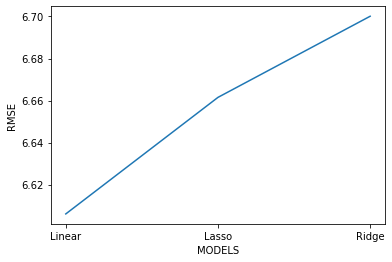

In [37]:
rmse_array = [rmse,rmse1,rmse2]
models =  ["Linear","Lasso","Ridge"]
plt.plot(models,rmse_array)
plt.xlabel("MODELS")
plt.ylabel("RMSE")
plt.show()

### CONCLUSION:
#### from above , one can say that linear regressions better result although difference is very small